In [2]:
%matplotlib inline
from new_methods.new_methods import My_NuScenes

nusc = My_NuScenes(version='v1.0-mini', dataroot='/data/datasets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.238 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [8]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os.path as osp

# 1600*900 for original image

total_dis = {'idx': [], 'max':[], 'min':[], 'avg':[]}
boundary = 3

for i in tqdm(range(len(nusc.sample))):
    _, diff, _ = nusc.check_depth(nusc.sample[i]['token'], boundary=boundary)
    if len(diff)!=0:
        max = np.max(diff)
        min = np.min(diff)
        avg = np.sum(diff)/len(diff)
        total_dis['idx'].append(i)
        total_dis['max'].append(max)
        total_dis['min'].append(min)
        total_dis['avg'].append(avg)

total_dis

100%|███████████████████████| 404/404 [00:25<00:00, 15.87it/s]

{'idx': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

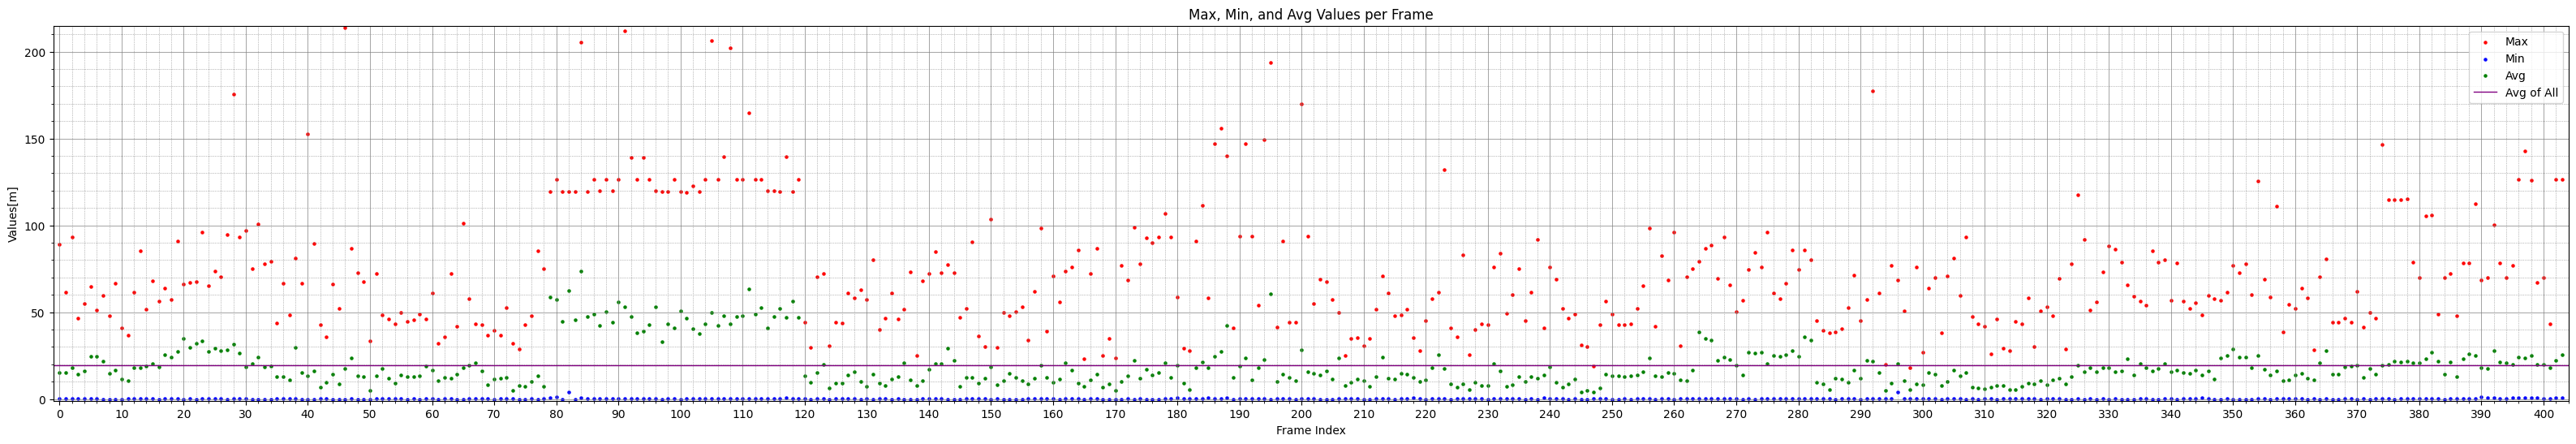

In [23]:
# 저장경로 설정
boundary_path = 'boundary_'+str(boundary)
base_path = '/home/byounghun/workspace/Nuscenes_tutorial/visualization/Graphs/'
file_name = 'Max_Min_Avg.png'
out_path = osp.join(base_path,boundary_path,file_name)

# total_dis에서 값 받아오기
idx = total_dis['idx']
max_values = total_dis['max']
min_values = total_dis['min']
avg_values = total_dis['avg']

avg_of_all = np.sum(avg_values)/len(avg_values)

# fig 생성
plt.figure(figsize=(40, 6))

# scatter
plt.scatter(idx, max_values, color='red', s=5, label='Max')  # Max 값은 빨간색
plt.scatter(idx, min_values, color='blue', s=5, label='Min')  # Min 값은 파란색
plt.scatter(idx, avg_values, color='green', s=5, label='Avg')  # Avg 값은 초록색
plt.axhline(y=avg_of_all, color='purple', linestyle='-', linewidth=1, label='Avg of All')

plt.title('Max, Min, and Avg Values per Frame')
plt.xlabel('Frame Index')
plt.xlim([np.min(idx)-1, np.max(idx)+1])
plt.ylabel('Values[m]')
plt.ylim([np.min(min_values)-1, np.max(max_values)+1])

plt.legend()

plt.grid(True)
plt.minorticks_on()

plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')  # 주 눈금에 대한 그리드
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')  # 보조 눈금에 대한 그리드

plt.xticks(np.arange(np.min(idx), np.max(idx)+1, 10))  # x축 눈금 간격 설정
plt.yticks(np.arange(np.min(min_values), np.max(max_values)+1, 50))  # y축 눈금 간격 설정

plt.savefig(out_path)

plt.show()